In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:\Excel\country_vaccinations.csv\country_vaccinations.csv")

df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [12]:
# 3. Inspect Data
print(df.shape)
print(df.info())
print(df.describe())
print(df.head(3))

(86512, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinatio

In [38]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [40]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


In [41]:
# Handle Missing Values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing)

Missing Values:
 daily_vaccinations_raw                 51150
people_fully_vaccinated                47710
people_fully_vaccinated_per_hundred    47710
people_vaccinated_per_hundred          45218
people_vaccinated                      45218
total_vaccinations                     42905
total_vaccinations_per_hundred         42905
daily_vaccinations_per_million           299
daily_vaccinations                       299
date                                       0
country                                    0
iso_code                                   0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


In [42]:
# Fill vaccination counts with 0 where missing
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)

# Fill daily vaccinations with 0 if missing
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)
df['daily_vaccinations_raw'] = df['daily_vaccinations_raw'].fillna(0)
df['daily_vaccinations_per_million'] = df['daily_vaccinations_per_million'].fillna(0)
# Fill categorical/text columns with forward fill
df['vaccines'] = df['vaccines'].ffill()
df['source_name'] = df['source_name'].ffill()
df['source_website'] = df['source_website'].ffill()

# Fill numerical columns
df['total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].fillna(0)
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(0)
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(0)

# 3. Check missing values after handling
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


In [43]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Convert DataFrame to NumPy array
data = numeric_cols.to_numpy()

# Column names
col_names = numeric_cols.columns
# Basic statistics using NumPy
for i, col in enumerate(col_names):
    col_data = data[:, i]
    print(f"\n--- {col} ---")
    print("Count:", col_data.size)
    print("Mean:", np.mean(col_data))
    print("Median:", np.median(col_data))
    print("Min:", np.min(col_data))
    print("Max:", np.max(col_data))
    print("Std Deviation:", np.std(col_data))
    print("Variance:", np.var(col_data))
    print("25th Percentile:", np.percentile(col_data, 25))
    print("75th Percentile:", np.percentile(col_data, 75))


--- total_vaccinations ---
Count: 86512
Mean: 23151169.938979562
Median: 1008.0
Min: 0.0
Max: 3263129000.0
Std Deviation: 161102746.5375513
Variance: 2.5954094941942504e+16
25th Percentile: 0.0
75th Percentile: 3697554.0

--- people_vaccinated ---
Count: 86512
Mean: 8451006.59159423
Median: 0.0
Min: 0.0
Max: 1275541000.0
Std Deviation: 49698384.66921699
Variance: 2469929438729462.5
25th Percentile: 0.0
75th Percentile: 1843103.0

--- people_fully_vaccinated ---
Count: 86512
Mean: 6341251.048501942
Median: 0.0
Min: 0.0
Max: 1240777000.0
Std Deviation: 38907060.63448682
Variance: 1513759367215633.5
25th Percentile: 0.0
75th Percentile: 1137869.0

--- daily_vaccinations_raw ---
Count: 86512
Mean: 110608.26574348068
Median: 0.0
Min: 0.0
Max: 24741000.0
Std Deviation: 786471.0573336257
Variance: 618536724023.4712
25th Percentile: 0.0
75th Percentile: 12806.25

--- daily_vaccinations ---
Count: 86512
Mean: 130851.67226511928
Median: 7245.0
Min: 0.0
Max: 22424286.0
Std Deviation: 766944.3098

In [44]:
# Correlation matrix (numeric cols only)
corr_matrix = np.corrcoef(data, rowvar=False)
print("\nCorrelation Matrix (NumPy):")
print(pd.DataFrame(corr_matrix, index=col_names, columns=col_names))

# Example: Daily vaccinations trend (NumPy)
daily_vacc = numeric_cols['daily_vaccinations'].to_numpy()
print("\nDaily Vaccinations Summary:")
print("Mean per day:", np.mean(daily_vacc))
print("Max in a day:", np.max(daily_vacc))
print("Total vaccinations given (sum):", np.sum(daily_vacc))

# Example: People fully vaccinated per hundred
fully_vacc = numeric_cols['people_fully_vaccinated_per_hundred'].to_numpy()
print("\nFully Vaccinated % Stats:")
print("Average:", np.mean(fully_vacc))
print("Median:", np.median(fully_vacc))
print("Max:", np.max(fully_vacc))


Correlation Matrix (NumPy):
                                     total_vaccinations  people_vaccinated  \
total_vaccinations                             1.000000           0.535036   
people_vaccinated                              0.535036           1.000000   
people_fully_vaccinated                        0.571087           0.891711   
daily_vaccinations_raw                         0.662729           0.414059   
daily_vaccinations                             0.688296           0.431237   
total_vaccinations_per_hundred                 0.222264           0.194590   
people_vaccinated_per_hundred                  0.106979           0.235686   
people_fully_vaccinated_per_hundred            0.104074           0.196629   
daily_vaccinations_per_million                 0.050911           0.048865   

                                     people_fully_vaccinated  \
total_vaccinations                                  0.571087   
people_vaccinated                                   0.891711  

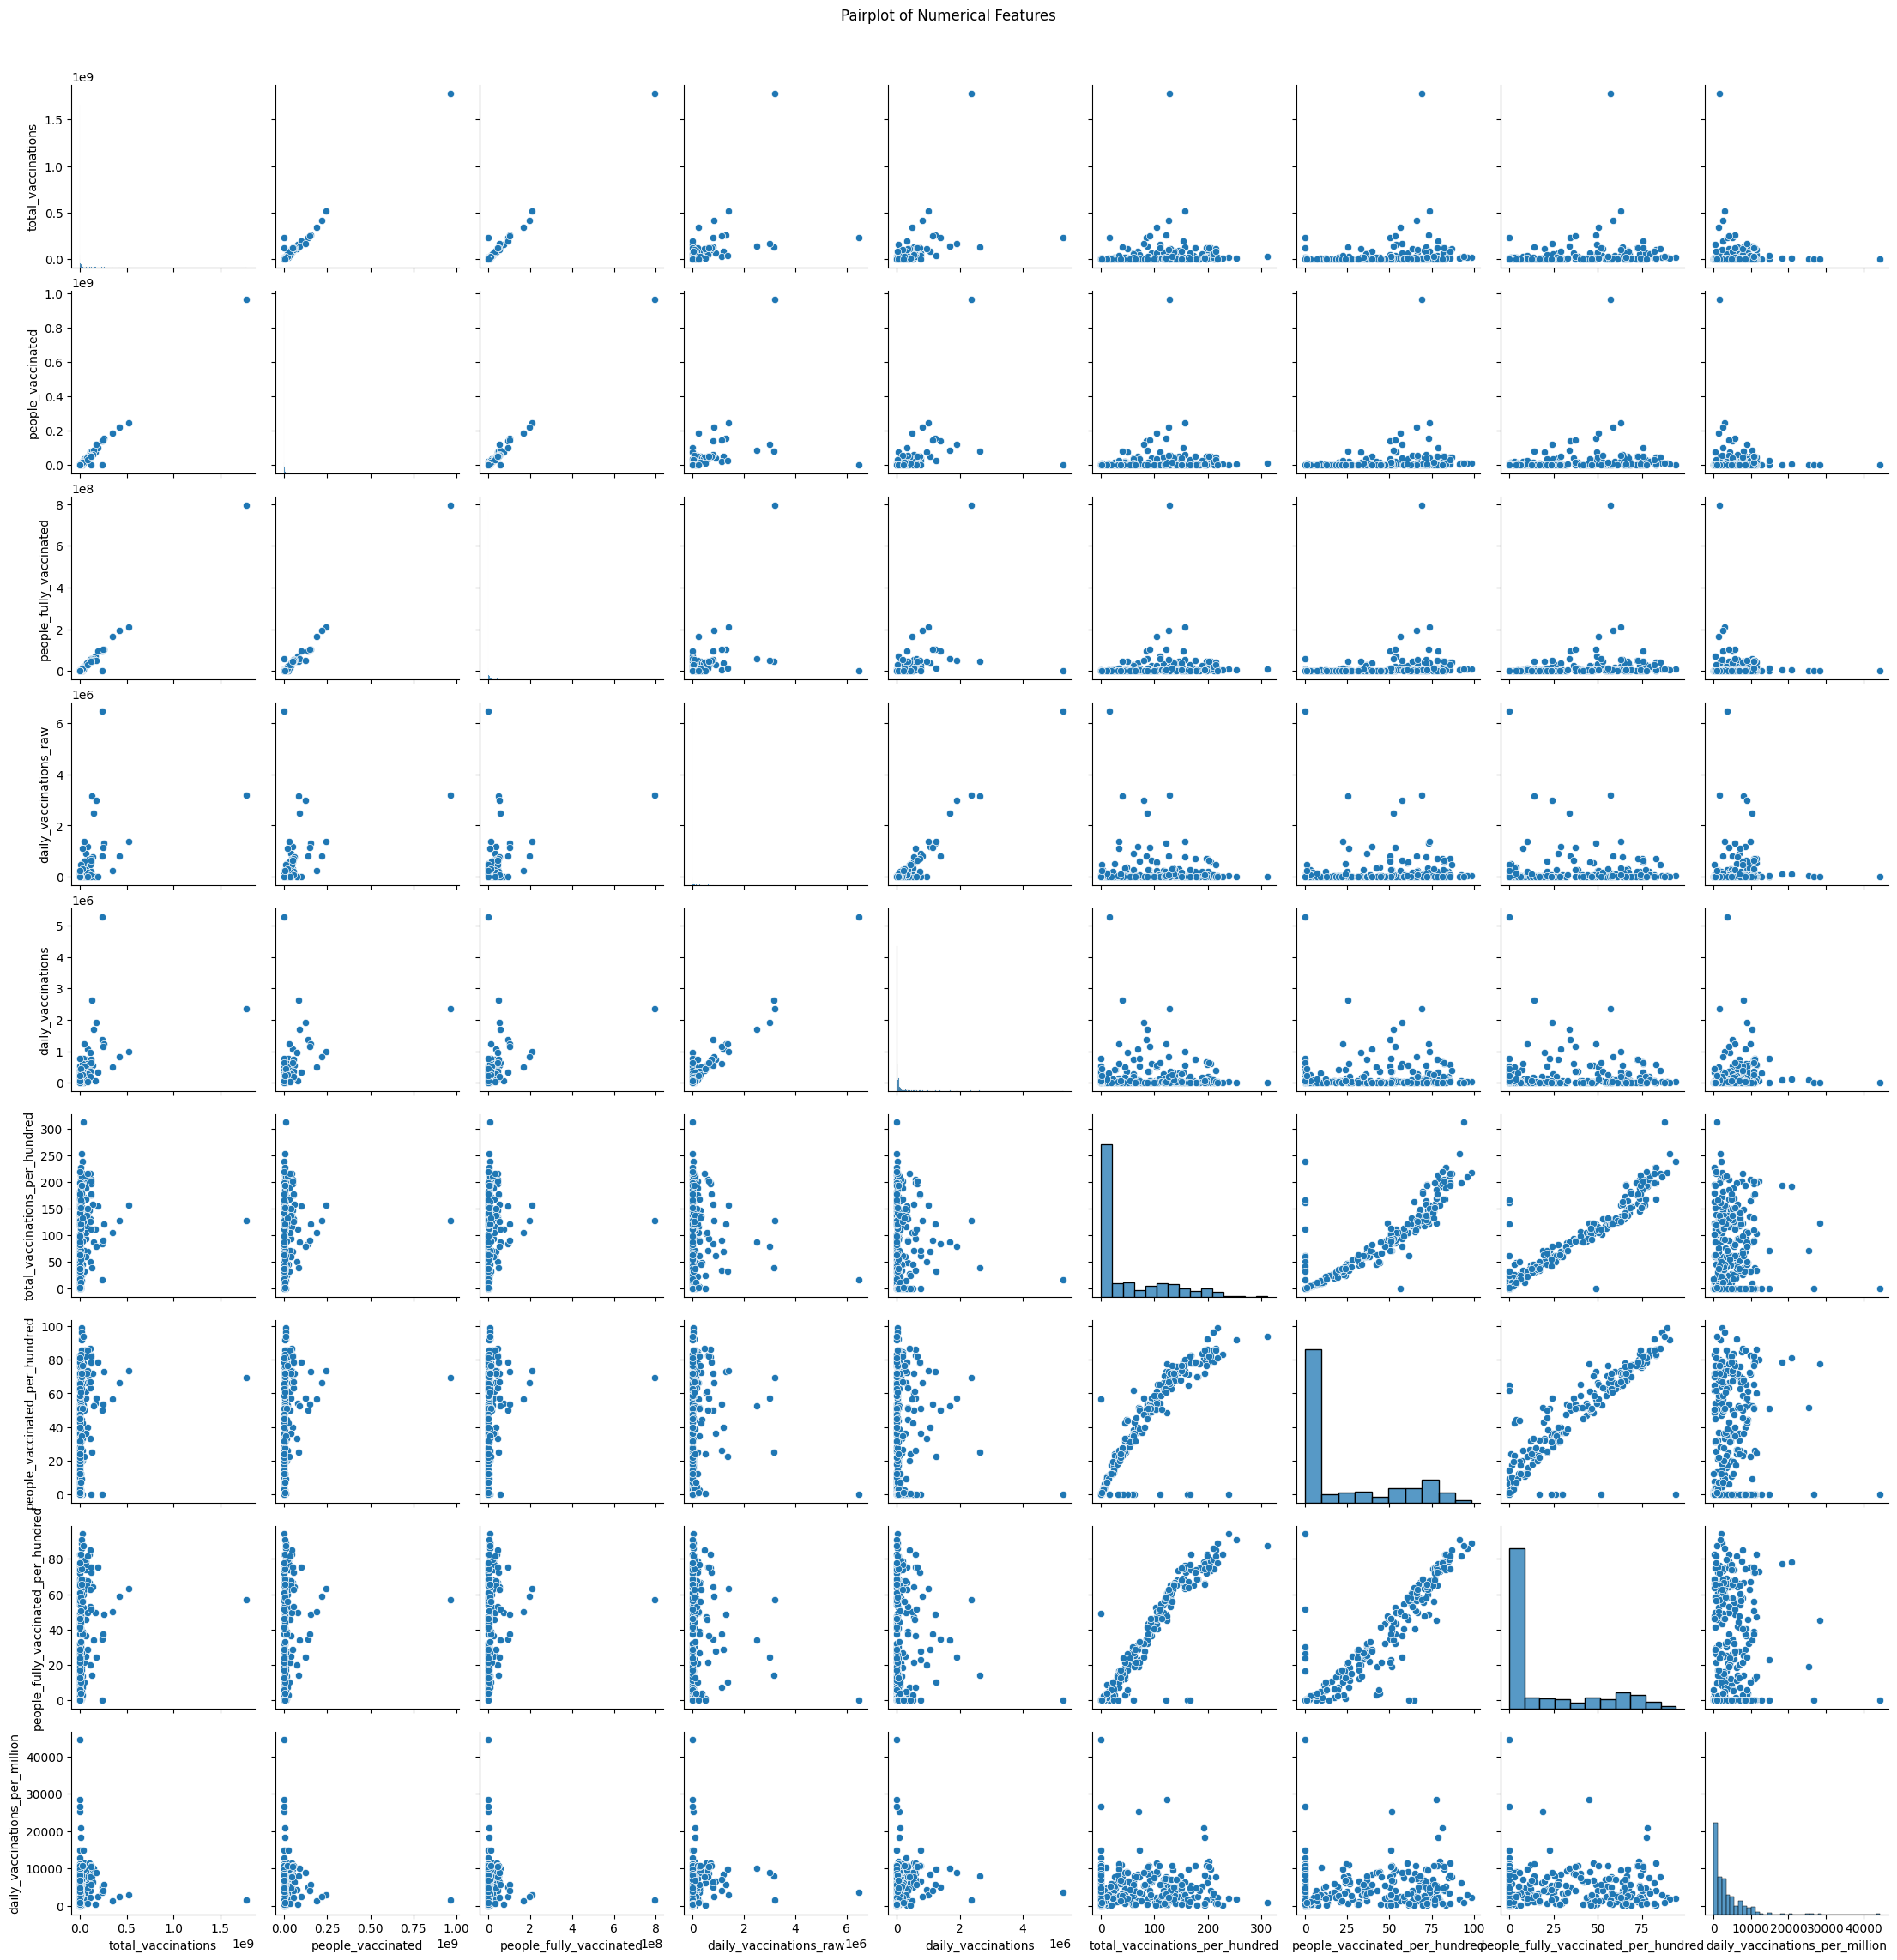

In [45]:
# 5. Pairplot
# -------------------------------
sns.pairplot(df[num_cols].sample(500))  # sample for speed
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

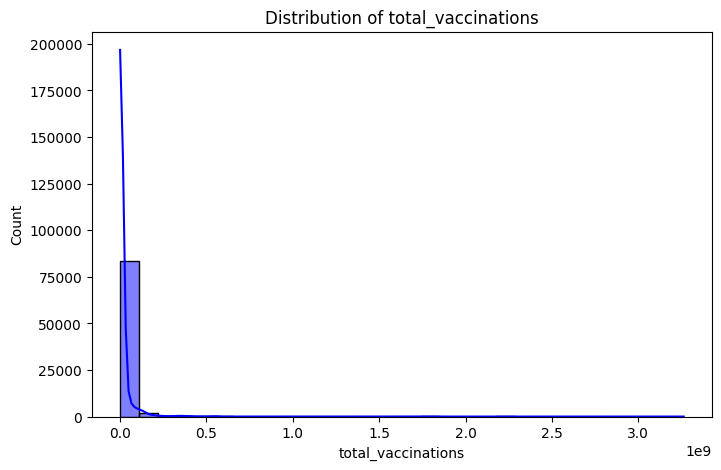

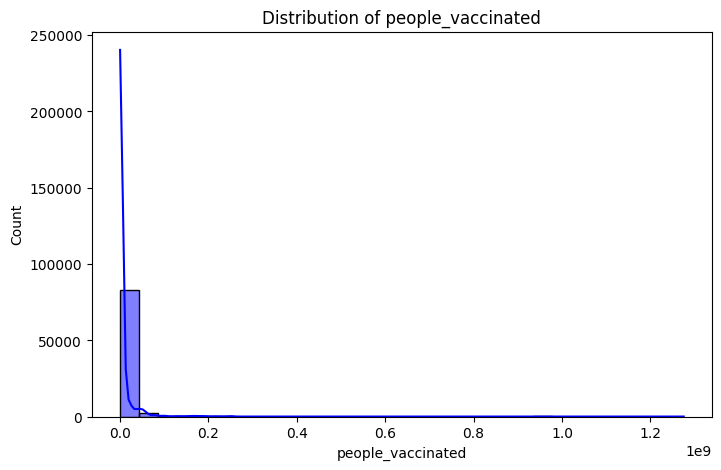

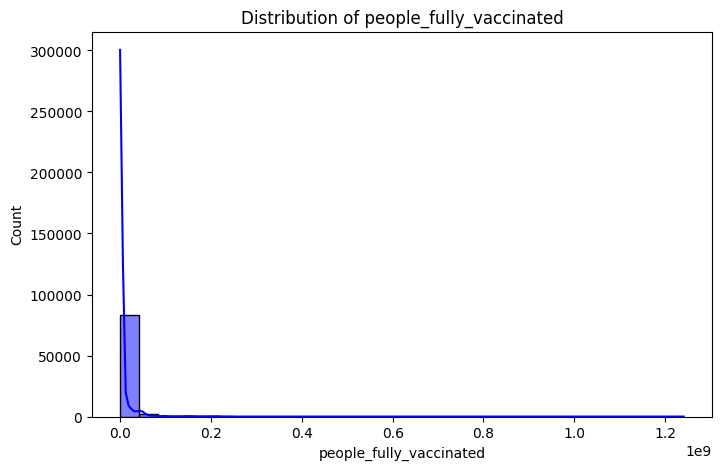

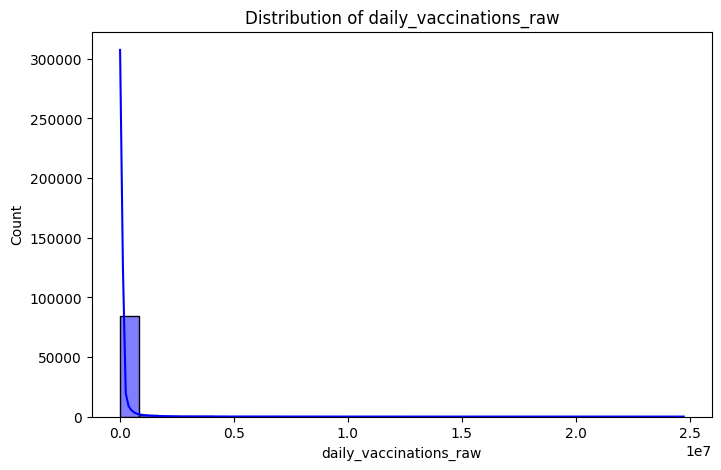

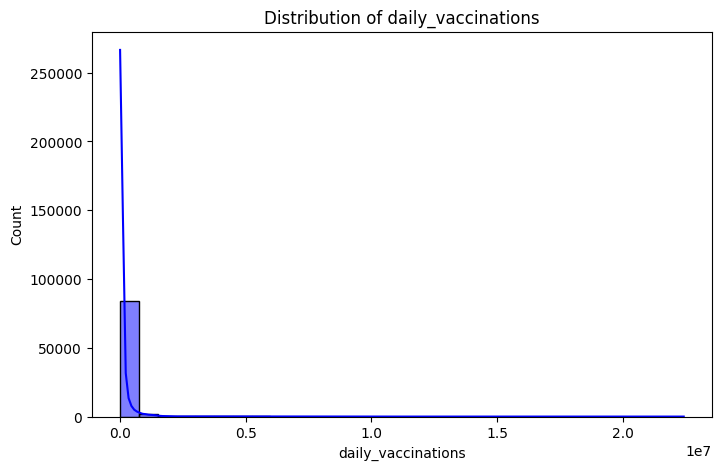

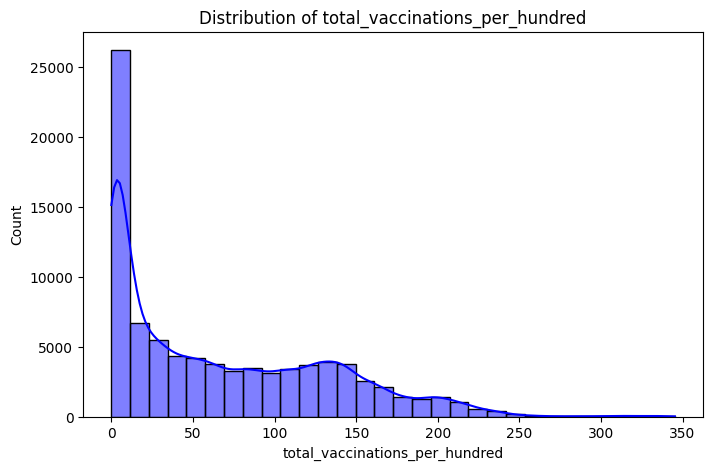

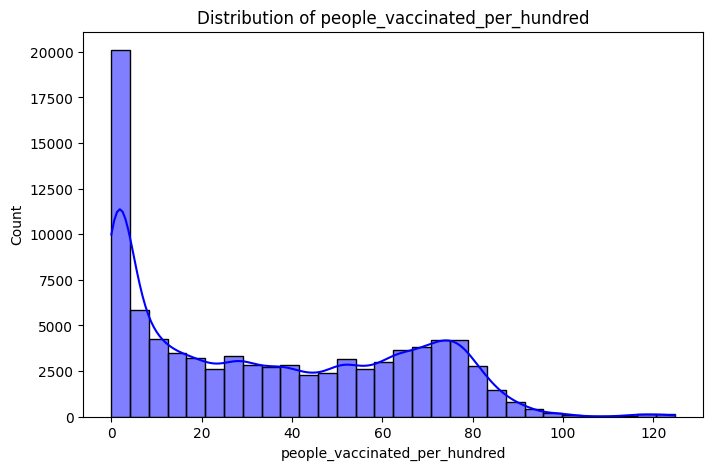

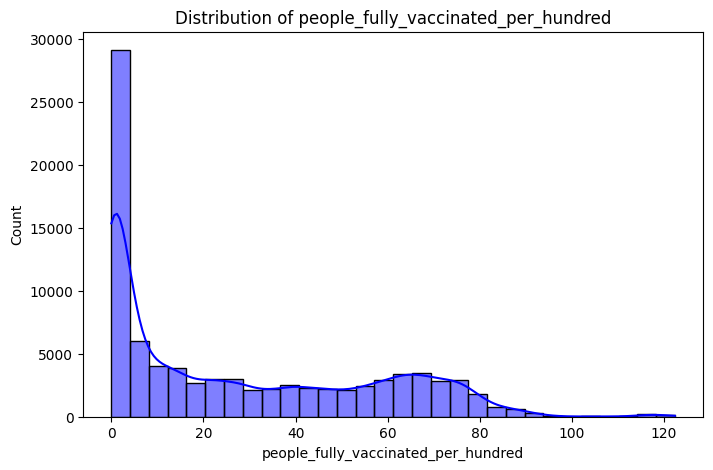

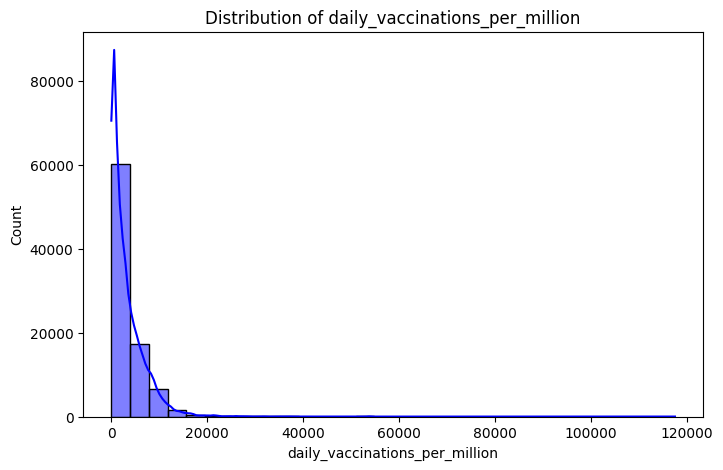

In [33]:
# 2. Distribution Plots (Histograms + KDE)
# -------------------------------
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_20140\1351314770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


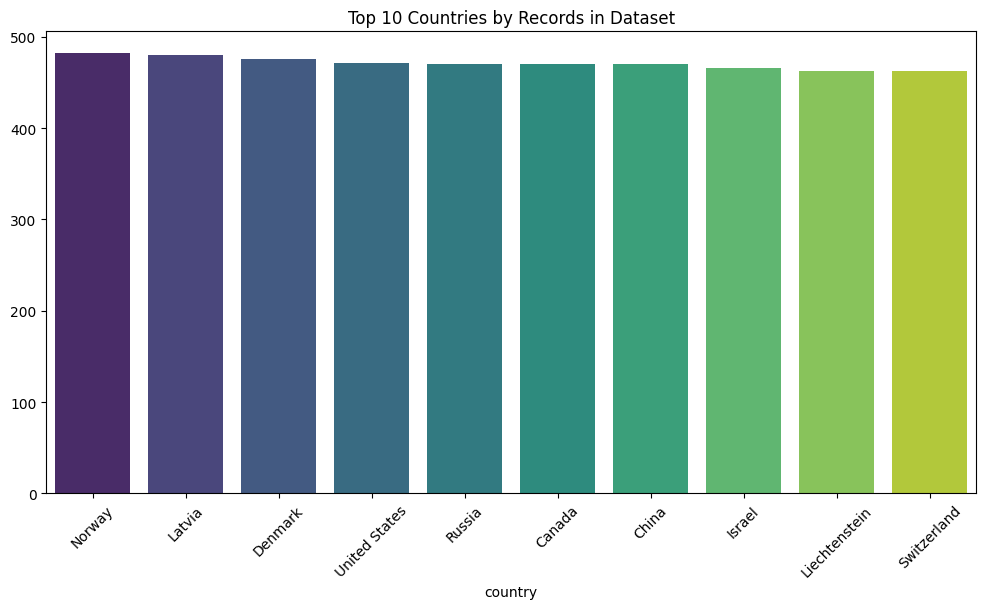

In [46]:
# -------------------------------
# 6. Barplot - Vaccines by Country
# -------------------------------
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Records in Dataset")
plt.xticks(rotation=45)
plt.show()

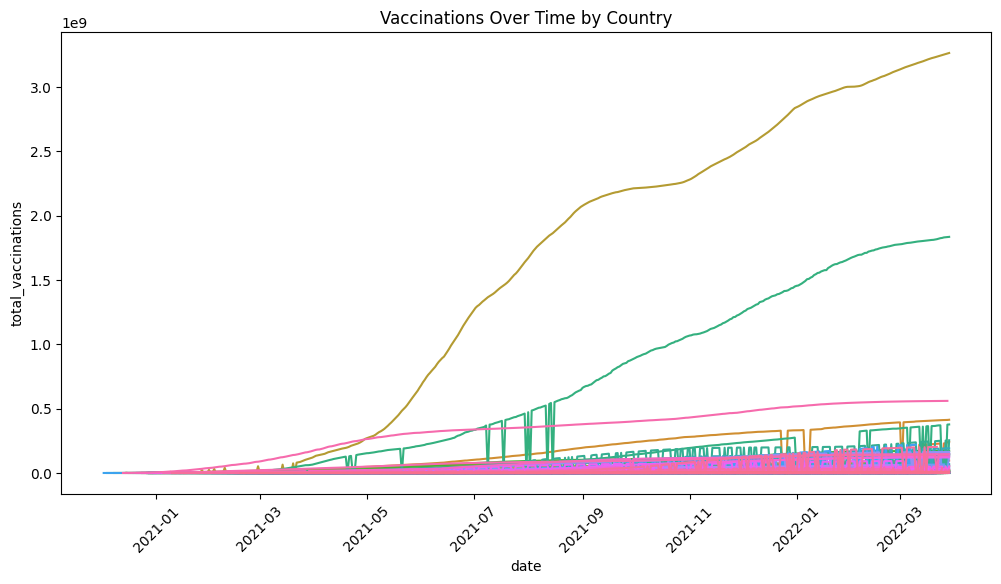

In [47]:
# 7. Lineplot - Vaccination Over Time
# -------------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="date", y="total_vaccinations", hue="country", legend=False)
plt.title("Vaccinations Over Time by Country")
plt.xticks(rotation=45)
plt.show()

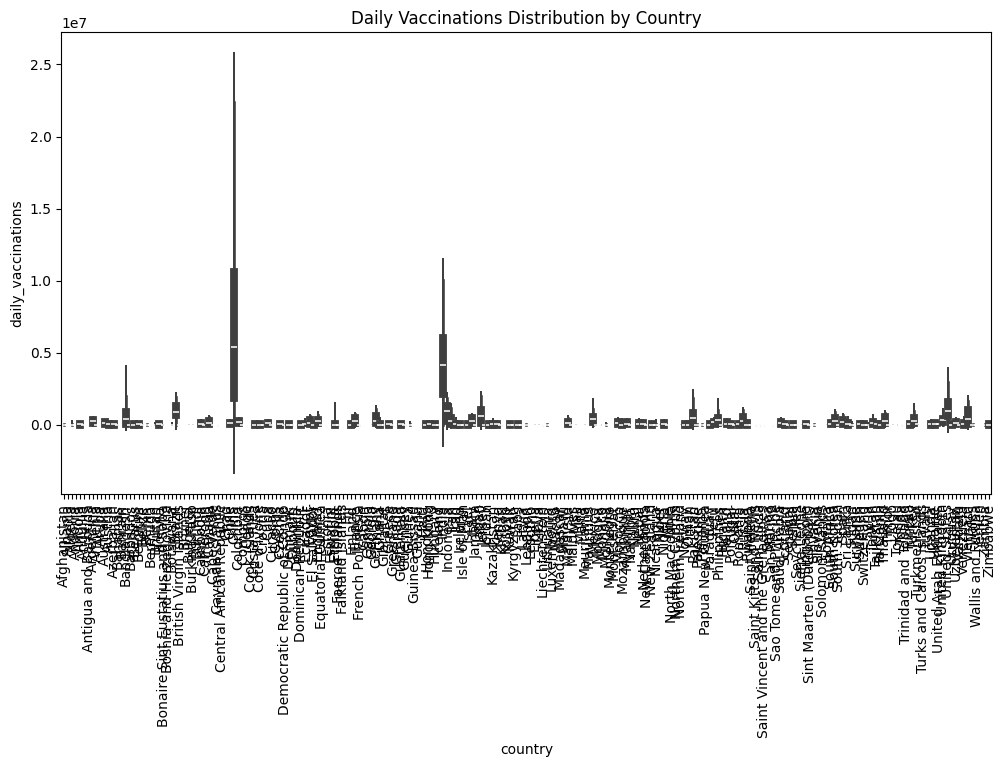

In [48]:
# -------------------------------
# 8. Violin Plot
# -------------------------------
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="country", y="daily_vaccinations")
plt.title("Daily Vaccinations Distribution by Country")
plt.xticks(rotation=90)
plt.show()

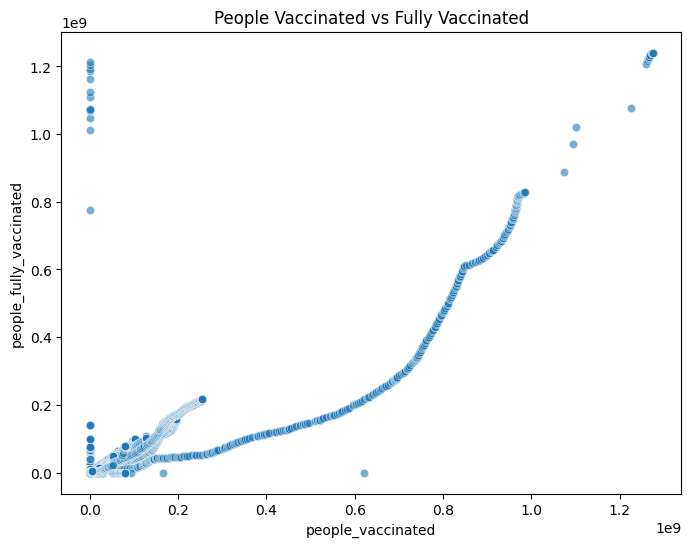

In [50]:
# 9. Scatter Plot
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="people_vaccinated", y="people_fully_vaccinated",  alpha=0.6)
plt.title("People Vaccinated vs Fully Vaccinated")
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_20140\1442263143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="vaccines", order=df['vaccines'].value_counts().index, palette="Set2")


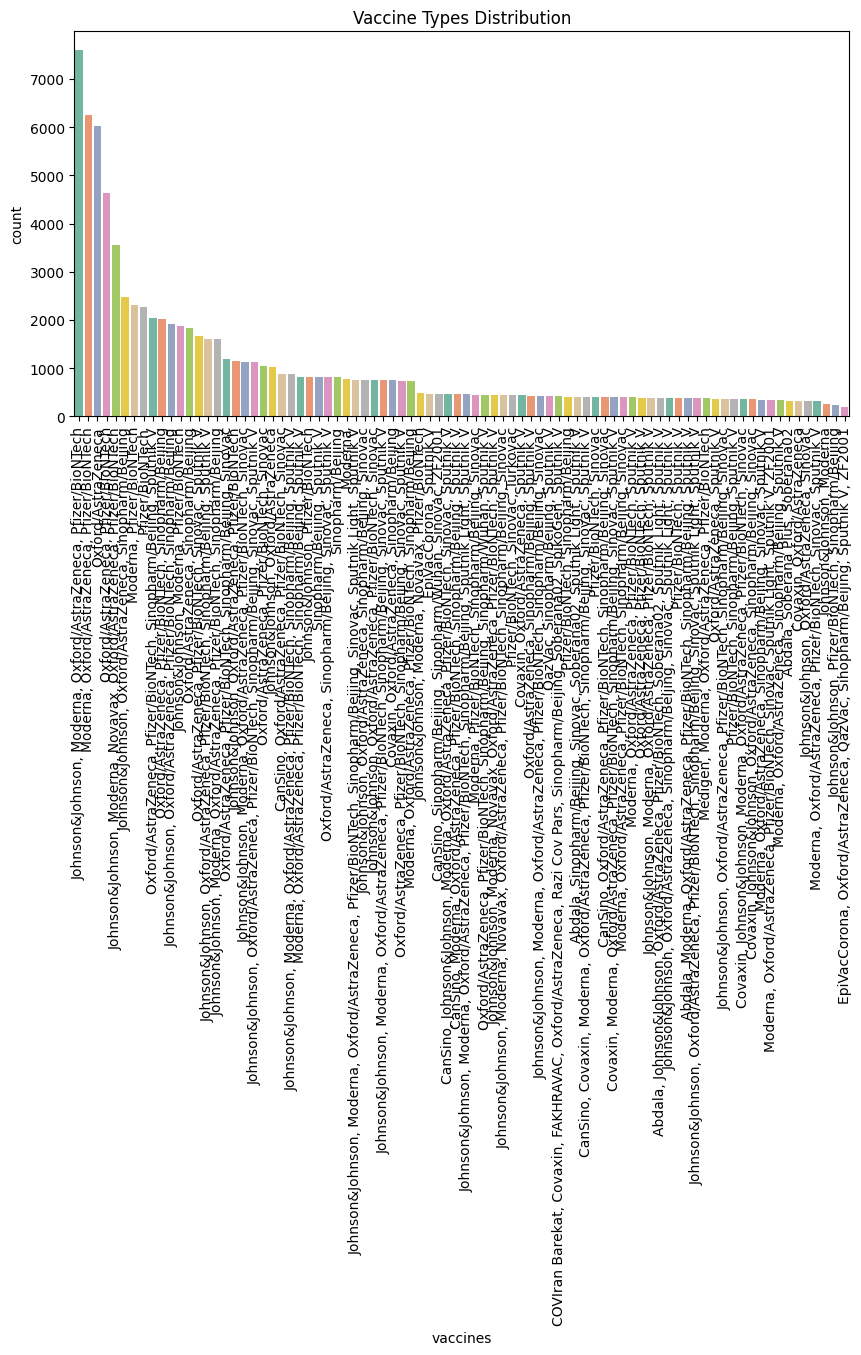

In [52]:
# 10. Count Plot
# -------------------------------
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="vaccines", order=df['vaccines'].value_counts().index, palette="Set2")
plt.title("Vaccine Types Distribution")
plt.xticks(rotation=90)
plt.show()
